## Data wranging and Analysis
###  By Umar Isah Adam

### Introduction

In this project, I will try Applying the concepts I learned from the lessons in Data Wrangling, to gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. 

The data will be gathered from 3 sources:

- WeRateDogs Twitter archive twitter_archive_enhanced.csv which is given. it contains tweet data about dog rating, name, and "stage"
- tweet image predictions image-predictions.tsv which is also available for download (the link is given). This file contains dog breed prediction results for all images from the WeRateDogs Twitter archive.
- Twitter API tweepy: Idially I should use this API to query additional data (in JSON format) for each tweet ID in the WeRateDogs Twitter archive. But at the time I am writing this, my twitter developer account is not ready, so, I will use Udacity provided equivalent data set tweet_json.txt for completing the project.

After gathering the data, I will assess it visually and programmatically for quality and tidiness issues. figure out at least eight (8) quality issues and two (2) tidiness issues.
I will clean each of the issues identified, document the cleaning steps taken and store the results to a clean and tidy DataFrame.
I will also Analyze and visualize the wrangled data to produce at least three (3) insights and one (1) visualization

Produce a 300-600 word written report with brief description of the wrangling efforts, frame it as an internal document. Create another 250-word-minimum written report to communicate the insights and displays the visualization(s) produced from the wrangled data. Frame it as an external document, like a blog post or magazine articleimport pandas as pd 

### Data Gathering

gathering the data include:
- Importing the twitter achive file and reading as csv
- Downloading image prediction file from the given url
- reading the downloaded file as jason

In [1]:
# this code import the necessary libraries to be used in the project
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sb
import tweepy 
from tweepy import OAuthHandler
import json 
from timeit import default_timer as timer

### Twitter achive file

In [2]:
# Create a variable twitter_achive to read the downloaded csv file given
twitter_achive = pd.read_csv('twitter-archive-enhanced.csv')
# take a look at the csv file
twitter_achive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### Image Prediction File

In [3]:
# download the image prediction file from the web using the given url
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read the downloaded TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [4]:
# Take a look at the file
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Tweet Jason
Here, I've already downloaded the file and uploaded it to the jupyter notebook, so I'm gonna go ahead and create the list of tweets for me to extract the information I need

In [5]:
# Create a empty list for insert each tweet info into it
tweets = []

# Read from the downloaded tesxt file
tweet_json = open('tweet_json.txt', 'r')
# Reading the file line by line as jason
for line in tweet_json:
    tweet = json.loads(line)
    tweets.append(tweet)

tweet_json.close()

In [6]:
# Check to see if the file is alright
print(tweets[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [7]:
"""extract some features like 'retweet_count', 'favorite_count' and 'id' out of the jason file"""

tweet_data = pd.DataFrame()  # create a empty dataframe for map the tweet_data info 

tweet_data['id'] = list(map(lambda tweet: tweet['id'], tweets))

tweet_data['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets))

tweet_data['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets))

In [8]:
# Take a look at the tweet data table
tweet_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


#### Assessing Data

Now we are going inspect the data visually and programmatically for quality and tidiness issues, to see if there are any missing, incorrect or unusual data.
##### Lets start with the archive

In [9]:
#take a look at the data to see if we can find issues that can bee seen 
twitter_achive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
# Look at the information programmatically
twitter_achive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
# check the description of the table 
twitter_achive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
# check for extreme values in the numerator
twitter_achive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
# Same for the numerator
twitter_achive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

#### Using the above information, we can clearly see that:
- tweet_id is of type int, timestamp and source are of string type, and they should be string, time and category respectively
- doggo, floofer, pupper and puppo coluns should be combined because they are all states.
- source is not human readable
- columns such as in_reply_to_status_id, retweeted_status_id ... are not usefull
- there are mis-spelt/incorrect names
- inconsistencies in capitalisation of the first letter of the names.

### Image Prediction Table

In [14]:
# Asses the the prediction table visually
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [15]:
# check for missing values in the information
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
# Asses the desription of the table
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### Three issues with this dataframe
- inconsistency in capitalisation (p1, p2 and p3)
- tweet_id is of type int
- unclear column names

### Tweet Data Table

In [17]:
# Asses the table visually
tweet_data

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [18]:
# Remove duplicates and sort the table in ascending order
tweet_data = tweet_data.sort_values(['retweet_count'], ascending = 0).drop_duplicates()
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 1037 to 290
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 73.6 KB


In [19]:
#take a look at the description of the tweet_data
tweet_data.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Cleaning Task

Tidiness 
- in the twitter achive table,  'doggo', 'floofer', 'pupper', 'puppo' should be in a single column
- tweet_data table, image prediction table and twitter achive table should be combined

Quality 

twitter_archive table
- columns such as in_reply_to_status_id, retweeted_status_id need to be dropped.
- records with no image url should be dropped because the rating is invalid without an image.
- tweet_id is of type int, timestamp and source needs to be converted to string, time and category respectively
- source should be human readable
- names should be consistently capitalized and standardized, mis-spelt/incorrect dog names and should be tackled.

image_predictions table
- Convert tweet_id to type string
- columns such as p1, p2 and p3 should be renamed.
- capitalisation of the prediction dog breeds should be consistent.


### Cleaning

Dog stage in 4 different columns

### Define

#### Combine 'doggo', 'floofer', 'pupper', 'puppo' to a single column

### Code

In [20]:
# Make a copy of the dataframes before commencing the cleaning process
twitter_archive_clean = twitter_achive.copy()
image_predictions_clean = image_prediction.copy()
tweet_data_clean = tweet_data.copy()

In [21]:
# concatenate the four columns into one using cat
# but before that we should combine None into empty string
stage = ['doggo','pupper', 'floofer', 'puppo' ]
for i in stage:
        twitter_archive_clean[i] = twitter_archive_clean[i].replace('None', '')

In [22]:
# combine the columns using cat
twitter_archive_clean['stage'] = twitter_archive_clean.doggo.str.cat(twitter_archive_clean.floofer).str.cat(twitter_archive_clean.pupper).str.cat(twitter_archive_clean.puppo)

# drop the old colomns
twitter_archive_clean = twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

#  fill the empty with np.nan
twitter_archive_clean['stage'] = twitter_archive_clean['stage'].replace('', np.nan)

### Test 

In [23]:
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
2243,667902449697558528,NaN,NaN,2015-11-21 03:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cleopatricia. She is a northern Paperb...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667902449...,9,10,Cleopatricia,NaN
1924,674075285688614912,NaN,NaN,2015-12-08 03:57:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mitch. He thinks that's a hat. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674075285...,11,10,Mitch,NaN
646,793150605191548928,NaN,NaN,2016-10-31 18:00:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nida. She's a free elf. Waited so long...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793150605...,11,10,Nida,NaN
621,796116448414461957,NaN,NaN,2016-11-08 22:25:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I didn't believe it at first but now I can see...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796116448...,11,10,None,NaN
2205,668633411083464705,NaN,NaN,2015-11-23 03:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Churlie. He likes bagels. 10/10 https:...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668633411...,10,10,Churlie,NaN


### Define

#### combine tweet_data table and twitter achive table

### Code

In [24]:
# Combine the two tables into one
# before we combine, lets rename the 'id' from `tweet_data` 
tweet_data.rename(columns={'id': 'tweet_id'}, inplace = True)

# check the number of foreign key in two tables
print(twitter_archive_clean.tweet_id.count())
print(tweet_data.tweet_id.count())

2356
2354


In [25]:
# join two tables on 'tweet_id' and use inner join method
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_data, on='tweet_id', how = 'inner')

In [26]:
# Now lets see 
twitter_archive_clean.tweet_id.count()

2354

In [27]:
# drop the duplicates due to join
twitter_archive_clean = twitter_archive_clean.drop_duplicates()

### Test

In [28]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9774,41048


In [29]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 16 columns):
tweet_id                      2354 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2354 non-null object
source                        2354 non-null object
text                          2354 non-null object
retweeted_status_id           179 non-null float64
retweeted_status_user_id      179 non-null float64
retweeted_status_timestamp    179 non-null object
expanded_urls                 2295 non-null object
rating_numerator              2354 non-null int64
rating_denominator            2354 non-null int64
name                          2354 non-null object
stage                         379 non-null object
retweet_count                 2354 non-null int64
favorite_count                2354 non-null int64
dtypes: float64(4), int64(5), object(7)
memory usage: 312.6+ KB


### Columns that are not useful
### Define
Drop retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id, in_reply_to_user_id Columns

### Code

In [30]:
# drop the columns that are not important
columns_drop = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id',
               'in_reply_to_user_id', 'in_reply_to_user_id']

twitter_archive_clean = twitter_archive_clean.drop(columns_drop, axis = 1)

### Test

In [31]:
# Checking for the edits
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 11 columns):
tweet_id              2354 non-null int64
timestamp             2354 non-null object
source                2354 non-null object
text                  2354 non-null object
expanded_urls         2295 non-null object
rating_numerator      2354 non-null int64
rating_denominator    2354 non-null int64
name                  2354 non-null object
stage                 379 non-null object
retweet_count         2354 non-null int64
favorite_count        2354 non-null int64
dtypes: int64(5), object(6)
memory usage: 220.7+ KB


#### Records with no image
### Define
#### Remove the records with no image

### Code

In [32]:
twitter_archive_clean = twitter_archive_clean.dropna(subset = ['expanded_urls'])

### Test

In [33]:
# Lets see if there are any 
twitter_archive_clean.expanded_urls.isnull().sum()

0

#### tweet_id is of int type

### Define
#### change tweet_id to string, timestamp to time, stage and source to categories

### Code

In [34]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])
twitter_archive_clean['stage'] = twitter_archive_clean['stage'].astype('category')
twitter_archive_clean['source'] = twitter_archive_clean['source'].astype('category')

### Test

In [35]:
# Lets see if its fixed
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2295 entries, 0 to 2353
Data columns (total 11 columns):
tweet_id              2295 non-null object
timestamp             2295 non-null datetime64[ns]
source                2295 non-null category
text                  2295 non-null object
expanded_urls         2295 non-null object
rating_numerator      2295 non-null int64
rating_denominator    2295 non-null int64
name                  2295 non-null object
stage                 373 non-null category
retweet_count         2295 non-null int64
favorite_count        2295 non-null int64
dtypes: category(2), datetime64[ns](1), int64(4), object(4)
memory usage: 184.3+ KB


#### Sources not readable
### Define
#### Make source more human readable

### Code

In [36]:
twitter_archive_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2161
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       32
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [37]:
# Lets replace the above jargons with some readable sentences
twitter_archive_clean['source'] = twitter_archive_clean['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iphone')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine - Make a Scene')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck')

### Test

In [38]:
twitter_archive_clean['source'].value_counts()

Twitter for iphone     2161
Vine - Make a Scene      91
Twitter Web Client       32
TweetDeck                11
Name: source, dtype: int64

### Incorrect names

### Define
#### correct dog names and make capitalization consistent.

## Capitalization

In [39]:
# To see the number of names starting with small letter words
twitter_archive_clean['name'].str.islower().sum()

109

In [40]:
# Make them all capital letters 
twitter_archive_clean['name'] = twitter_archive_clean.name.str.capitalize()

### Test

In [41]:
# Testing to see if it is fixed
twitter_archive_clean['name'].str.islower().sum()

0

### Incorrect names
### Define
#### From the visual assessment, Most of the names that are incorrect are two characters or less long

### Code

In [42]:
twitter_archive_clean[twitter_archive_clean['name'].str.len() < 3]['name'].value_counts()

A     55
Bo     9
An     7
Jo     1
O      1
Al     1
Jd     1
My     1
Mo     1
By     1
Ed     1
Name: name, dtype: int64

In [43]:
names = ['A', 'Bo', 'An', 'Ed', 'O', 'By', 'Al', 'Mo', 'Jd', 'Jo', 'My', 'The']
for name in names:
        twitter_archive_clean['name'].replace(name, 'None', inplace=True)

### Test

In [44]:
twitter_archive_clean[twitter_archive_clean['name'].str.len() < 3]['name'].value_counts()

Series([], Name: name, dtype: int64)

### Image Prediction Table

In [45]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### tweet_id is of int type
### Define
#### Convert tweet_id to string format

### Code

In [46]:
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)

### Test

In [47]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### p1, p2 and p3 column names not clear
### Define
#### Rename p1, p2 and p3 columns

### Code

In [48]:
image_predictions_clean.rename(columns ={'p1':'1st_prediction'}, inplace = True)
image_predictions_clean.rename(columns ={'p2':'2nd_prediction'}, inplace = True)
image_predictions_clean.rename(columns ={'p3':'3rd_prediction'}, inplace = True)
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,1st_prediction,p1_conf,p1_dog,2nd_prediction,p2_conf,p2_dog,3rd_prediction,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [49]:
image_predictions_clean['1st_prediction'] = image_predictions_clean['1st_prediction'].str.capitalize()
image_predictions_clean['2nd_prediction'] = image_predictions_clean['2nd_prediction'].str.capitalize()
image_predictions_clean['3rd_prediction'] = image_predictions_clean['3rd_prediction'].str.capitalize()

### Test

In [50]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,1st_prediction,p1_conf,p1_dog,2nd_prediction,p2_conf,p2_dog,3rd_prediction,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Define
#### Merge the whole data in one table to form a single dataframe

### Code

In [51]:
twitter_archive_clean = twitter_archive_clean.merge(image_predictions_clean, on='tweet_id', how='inner')

### Test

In [52]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 22 columns):
tweet_id              2073 non-null object
timestamp             2073 non-null datetime64[ns]
source                2073 non-null object
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
stage                 320 non-null category
retweet_count         2073 non-null int64
favorite_count        2073 non-null int64
jpg_url               2073 non-null object
img_num               2073 non-null int64
1st_prediction        2073 non-null object
p1_conf               2073 non-null float64
p1_dog                2073 non-null bool
2nd_prediction        2073 non-null object
p2_conf               2073 non-null float64
p2_dog                2073 non-null bool
3rd_prediction        2073 non-null object
p3_conf               2073 non-

### Save the File

In [53]:
# save the dataframe twitter_archive_clean to a csv file
twitter_archive_clean.to_csv('twitter_archive_master.csv')

## Analyze the data

In [54]:
# Lets start by seeing the correlation between rating and favorite counts
# To do that we will start by creating rating column 
df = pd.read_csv('twitter_archive_master.csv')

# Creating the rating column 
df['rating'] = (df['rating_numerator'] / df['rating_denominator'])

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 24 columns):
Unnamed: 0            2073 non-null int64
tweet_id              2073 non-null int64
timestamp             2073 non-null object
source                2073 non-null object
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
stage                 320 non-null object
retweet_count         2073 non-null int64
favorite_count        2073 non-null int64
jpg_url               2073 non-null object
img_num               2073 non-null int64
1st_prediction        2073 non-null object
p1_conf               2073 non-null float64
p1_dog                2073 non-null bool
2nd_prediction        2073 non-null object
p2_conf               2073 non-null float64
p2_dog                2073 non-null bool
3rd_prediction        2073 non-null object


### Insight 1: The first thing that come to my mind is the correlation between rating and favorite counts

### Correlation between favorite counts and rating

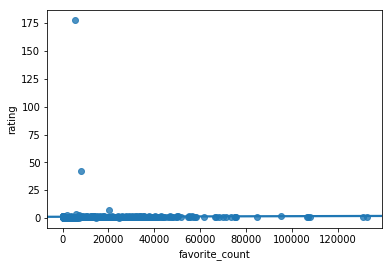

In [56]:
# define x as favorite_counts and y as rating
x = df.favorite_count
y = df.rating

# use seaborn to plot the graph of x and y
ax = sb.regplot(x=x, y= y, data=df, x_jitter=.1)

In [57]:
# Find the correlation between them using corr function
df['favorite_count'].corr(df['rating'])

0.015592470631514864

### It is clearly seen that favorite counts and ratings have a slight positive correlation. 

### Now lets see the correlation between rating and retweet counts

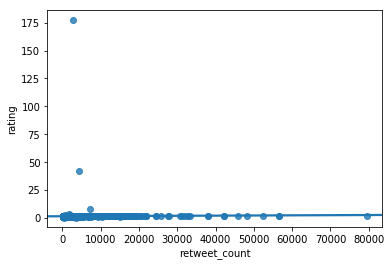

In [58]:
# Define x as favorite counts and y as rating
x = df.retweet_count
y = df.rating
# plot the graph of x and y using seaborn
ax = sb.regplot(x=x, y= y, data=df, x_jitter=.1)

In [59]:
# find the correlation using corr function
df['retweet_count'].corr(df['rating'])

0.017448128212707047

###  Lastly the correlation between retweet counts and favorite counts

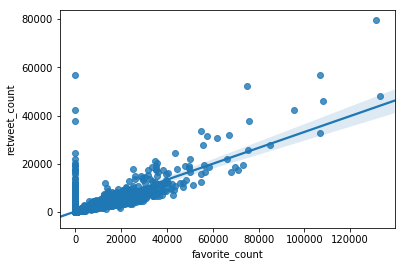

In [60]:
# define x as favorite count and y as retweet count
x = df.favorite_count
y = df.retweet_count
# plot x and y using seaborn
ax = sb.regplot(x=x, y= y, data=df, x_jitter=.1)

In [61]:
# find the correlation using corr function
df['retweet_count'].corr(df['favorite_count'])

0.79047607884450788

### It can be seen that favorite and retweet counts have a strong positive correlation. The  heavily concentrated at from 0 to 40000 with many above the line at 0 favorite.

## Conclusion
The Wrangling process undergone in this project include:

#### Gathering data from different sources in a variety of formats:
The data was gathered from three different sources, the first one, Twitter Archive was given by udacity as downloadable csv format, the second was downloaded via a url which is also given in the projects details, and lastly I was supposed to use twitter api to get the jason file of the last dataframe, but due to the fact that my twitter developer account was not approved and the time was tight, I chose to use the downloadable format of the data.

The data was assessed both visually and programmatically to identify potential data tidiness and quality issues that would be preventing any meaningful data insight analysis from happening. 

The identified quality and tidiness issues identified were addressed and a test was issued to make sure the result was the desired one.

The 3 datasets was merged into one single master dataset and stored it to a csv file.

The master dataset was copied and insight, analysis and visualization were carried out on itto produce a report documenting the wrangling effort and another, three insights were communicated which include correlation between rating and favorites count, rating and retweet counts and lastly favorite and retweet counts.

In [82]:
df.loc[df['rating'] == 0.00]

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,...,1st_prediction,p1_conf,p1_dog,2nd_prediction,p2_conf,p2_dog,3rd_prediction,p3_conf,p3_dog,rating
249,249,835152434251116546,2017-02-24 15:40:31,Twitter for iphone,When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0,10,None,NaN,...,Swing,0.967066,False,American_staffordshire_terrier,0.012731,True,Staffordshire_bullterrier,0.007039,True,0.0
832,832,746906459439529985,2016-06-26 03:22:31,Twitter for iphone,"PUPDATE: can't see any. Even if I could, I cou...",https://twitter.com/dog_rates/status/746906459...,0,10,None,NaN,...,Traffic_light,0.470708,False,Fountain,0.199776,False,Space_shuttle,0.064807,False,0.0


In [73]:
df.rating.mean()

1.1699870317815324

In [79]:
df.rating.value_counts()

1.200000      477
1.000000      431
1.100000      419
1.300000      283
0.900000      151
0.800000       95
0.700000       51
1.400000       40
0.500000       35
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        4
0.000000        2
0.818182        1
2.700000        1
3.428571        1
0.636364        1
177.600000      1
2.600000        1
42.000000       1
7.500000        1
1.500000        1
Name: rating, dtype: int64